<a href="https://colab.research.google.com/github/Angelica2929/sales_prediction/blob/main/Preprocesamiento_modelo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Proyecto 1 Predicción Ventas - Preprocesamiento y Análisis de Modelos**

El objetivo de este paso es ayudar al distribuidor usando el aprendizaje automático para realizar predicciones sobre futuras ventas basándose en los datos proporcionados.



1.Importar las biblioetcas necesarias.

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder,OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn import set_config
set_config(display='diagram')

2.Cargar estructura de datos

In [2]:
filename = '/content/drive/MyDrive/CODING DOJO/WEEK 5/sales_predictions.csv'
df = pd.read_csv(filename)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


3. Explorar los datos

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Al realizar la exploración de nuestra data, podemos identificar 3 tipos de caracteristicas asi:


**NUMERICAS**

'Item_Weight',
'Item_Fat_Content',
'Item_Visibility',
'Item_MRP',
'Outlet_Establishment_Year'

**ORDINALES**.                                              
'Item_Fat_Content'

'Outlet_Size',

**NOMINALES**

'Item_Identifier',
'Item_Type',
'Outlet_Identifier',
'Outlet_Location_Type',
'Outlet_Type'

Para el proceso de aprendizaje de nuestro modelo sera necesario transformar nuestras caracteristicas nominales y si es el caso ordinales en variables numericas, esto para mayor funcionalidad de nuestro modelo.

Adicionalmente identificamos datos faltantes en las categorias de Item_Weight (Variable Númerica)y OutleT Size (Variable Categórica), situación que debemos abordar a continuación con el metodo de Mean Imputation para variables númericas y Most_frequent imputation para variables categóricas.

4. Codificación ordinal

In [4]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [5]:
# Codificación ordinal "Item_Fat_Content"
replacement_dictionary = {'Low':1, 'Low Fat':1, 'LF':1, 'low fat':1, 'Regular':0, 'reg':0}
df['Item_Fat_Content'].replace(replacement_dictionary, inplace=True)
df['Item_Fat_Content']

0       1
1       0
2       1
3       0
4       1
       ..
8518    1
8519    0
8520    1
8521    0
8522    1
Name: Item_Fat_Content, Length: 8523, dtype: int64

In [6]:
df['Item_Fat_Content'].value_counts()

1    5517
0    3006
Name: Item_Fat_Content, dtype: int64

Nuestra variable Item Fat Content es una variable de tipo ordinal, fue necesario una conversion, por lo cual hicimos  un diccionario y un replace para ajustar la informacion con inconformidades. Ahora esta ordinalmente codificada.

Aplicar el mismo metodo para la variable Outlet Size.

In [7]:
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [8]:
# Codificación ordinal "Outlet_Size"
replacement_dictionary = {'High':2, 'Medium':1, 'Small':0}
df['Outlet_Size'].replace(replacement_dictionary, inplace=True)
df['Outlet_Size'].replace


<bound method Series.replace of 0       1.0
1       1.0
2       1.0
3       NaN
4       2.0
       ... 
8518    2.0
8519    NaN
8520    0.0
8521    1.0
8522    0.0
Name: Outlet_Size, Length: 8523, dtype: float64>

In [9]:
df['Outlet_Size'].value_counts()

1.0    2793
0.0    2388
2.0     932
Name: Outlet_Size, dtype: int64

5. Train test Split

In [10]:
X = df.drop(['Item_Outlet_Sales','Item_Identifier','Outlet_Identifier'], axis=1)
y = df['Item_Outlet_Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

Nuestra variable target (a predecir) es **Item_Outlet_Sales** que corresponde al total de ventas por tienda, para predecir dicha variable nos apoyaremos basados en el resto de categorias que vienen incluidas como peso, contenido graso,categoria, precio, año creacion tienda etc...

Este proceso consiste en dividir nuestro conjunto de datos en 2 grupos (entrenamiento y prueba), y es aqui donde ocurre el proceso de aprendizaje y validacion de nuestro modelo, esto con el proposito de conocer como se va a comportar nuestro target en la medida que nuestro conjunto de caracteristicas se mueva de una o determinada forma.


6.Instanciar selectores de columnas

In [11]:
cat_selector = make_column_selector(dtype_include='object')
cat_selector

In [12]:
#Nos devuelve una lista con las columnas que coinciden con el patron solicitado, en este caso, las categoricas.
cat_selector(X_train)

['Item_Type', 'Outlet_Location_Type', 'Outlet_Type']

In [13]:
num_selector = make_column_selector(dtype_include='number')
num_selector

In [14]:
#Nos devuelve una lista con las columnas que coinciden con el patron solicitado, en este caso, las numericas.
num_selector(X_train)

['Item_Weight',
 'Item_Fat_Content',
 'Item_Visibility',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'Outlet_Size']

7.Instanciar transformadores

In [15]:
# Imputers
freq_imputer = SimpleImputer(strategy='most_frequent')
mean_imputer = SimpleImputer(strategy='mean')

# Scaler
scaler = StandardScaler()

# One-hot encoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

#Ordinal Encoder
ordinal_encoder = OrdinalEncoder()

Tenemos 2 simple imputers con diferentes estrategias de imputacion, most frequent y mean imputer.

8. Instanciar pipelines

In [16]:
#Pipeline Numerico
numeric_pipe = make_pipeline(mean_imputer, scaler)
numeric_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [17]:
# Pipeline Categorico
categorical_pipe = make_pipeline(freq_imputer, ohe)
categorical_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [18]:
#Pipeline Nomina
nominal_pipe = make_pipeline(freq_imputer, ordinal_encoder)
nominal_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('ordinalencoder', OrdinalEncoder())])

9. Instanciar ColumnTransformer

In [19]:
# Tuplas para Column Transformer
number_tuple = (numeric_pipe, num_selector)
category_tuple = (categorical_pipe, cat_selector)
nominal_tuple = (nominal_pipe, cat_selector)
# ColumnTransformer
preprocessor = make_column_transformer(number_tuple, category_tuple, nominal_tuple, remainder='passthrough')
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fa81addc250>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fa81ae474d0>),
                                ('pipeline-3',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fa81ae474d0>)])

Las tuplas lo que hacen es que nuestros transformadores coincidan con los diferentes tipos de datos de nuestras columnas, y haremos uso de esos transformdores a traves de pipelines.

10.Transformador de datos

In [20]:
# fit on train
preprocessor.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fa81addc250>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fa81ae474d0>),
                                ('pipeline-3',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fa81ae474d0>)])

El codigo anterior nos permite ajustar el column transformer en nuestro espacio de entrenamiento, ajustando nuestros transformadores dentro del COLUMN TRANSFORMER.

In [21]:
# Transformar datos de entrenamiento y de prueba
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

11.Inspeccionar el resultado

In [22]:
print(np.isnan(X_train_processed).sum().sum(), 'valores faltantes en datos de entrenamiento')
print(np.isnan(X_test_processed).sum().sum(), 'valores faltantes en datos de prueba')
print('\n')
print('Toda la data en X_train_processed es', X_train_processed.dtype)
print('Toda la data en X_test_processed es', X_test_processed.dtype)
print('\n')
print('shape de la data es', X_train_processed.shape)
print('\n')
X_train_processed

0 valores faltantes en datos de entrenamiento
0 valores faltantes en datos de prueba


Toda la data en X_train_processed es float64
Toda la data en X_test_processed es float64


shape de la data es (6392, 32)




array([[ 0.81724868,  0.7403206 , -0.71277507, ...,  9.        ,
         2.        ,  2.        ],
       [ 0.5563395 , -1.35076614, -1.29105225, ..., 13.        ,
         2.        ,  2.        ],
       [-0.13151196, -1.35076614,  1.81331864, ..., 10.        ,
         0.        ,  1.        ],
       ...,
       [ 1.11373638,  0.7403206 , -0.92052713, ...,  8.        ,
         1.        ,  1.        ],
       [ 1.76600931,  0.7403206 , -0.2277552 , ..., 13.        ,
         1.        ,  1.        ],
       [ 0.81724868,  0.7403206 , -0.95867683, ...,  9.        ,
         0.        ,  1.        ]])

Como podemos leerlo en el array de numpy arrojado, no hay valores faltantes, todos los datos son de tipo numerico flotante y despues del one hot coder tenemos mas columnas que al inicio, ahora tenemos 1589 vs 32 columnas iniciales, todas fueron escaladas.


Realizamos varias tranformaciones en un solo paso de transformacion, acortando el codigo.

# **Modelo Regresion Lineal**

**Importar modelo**

In [23]:
from sklearn.linear_model import LinearRegression

**Instanciar el modelo**

In [24]:
reg = LinearRegression()

**Entrenar el modelo**

In [26]:
reg.fit(X_train_processed,y_train)

LinearRegression()

# **Medición del rendimiento del modelo**

# **Coeficiente de Determinación**

In [27]:
train_score = reg.score(X_train_processed, y_train)
print(train_score)

0.5605660416716669


Se calcula coeficiente de determinacion para evaluar el modelo, la anterior metrica nos indica que el 56.05% de la variación en las ventas se puede explicar por las características de nuestro modelo.

In [28]:
test_score = reg.score(X_test_processed, y_test)
print(test_score)

0.5658422861507393


**Obtención de predicciones**

In [29]:
train_pred_reg = reg.predict(X_train_processed)

test_pred_reg = reg.predict(X_test_processed)

# **RECM**

In [34]:
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

Para calcular el RECM debemos primero calcular el ECM asi:


In [31]:
mse_train = mean_squared_error(y_train, train_pred_reg)
mse_test = mean_squared_error(y_test, test_pred_reg)

In [32]:
rmse_train = np.sqrt(mean_squared_error(y_train, train_pred_reg))
rmse_test = np.sqrt(mean_squared_error(y_test, test_pred_reg))

In [33]:
rmse_test

1094.4547829107291

In [35]:
rmse_train

1140.3882386001144

In [36]:
y_train

4776     515.3292
7510    3056.0220
5828    1577.9460
5327    1331.6000
4810    1687.1372
          ...    
5734     280.9676
5191    1301.6390
5390    6145.3340
860     1649.8524
7270     965.4100
Name: Item_Outlet_Sales, Length: 6392, dtype: float64

In [37]:
y_test

7503    1743.0644
2957     356.8688
7031     377.5086
1084    5778.4782
856     2356.9320
          ...    
4753    3793.7284
4836    2410.8618
8064    5309.7550
4418    2530.7058
1784    4138.6128
Name: Item_Outlet_Sales, Length: 2131, dtype: float64

In [52]:
np.array(y_test)

array([1743.0644,  356.8688,  377.5086, ..., 5309.755 , 2530.7058,
       4138.6128])

In [53]:
np.array(test_pred_reg)

array([1343.96537507,  777.28182464,  836.80378664, ..., 3411.65870793,
       1981.06208919, 2435.20646898])

Revisando loos resultados obtenidos en MSE y RMSE que aunque son altos son validos si nos fijamos en nuestra variable resultado, lo que nos esta indicando dicha metrica es que tenemos una desviacion de 1094 USD en nuestras ventas, lo cual es acorde a nuestro score de R2 que nos esta dando en un 56,5%, un modelo que tiene alto desajuste.

# **ARBOL DE REGRESIÓN**

**Importar el modelo a usar**

In [38]:
from sklearn.tree import DecisionTreeRegressor

**Hacer una instancia del modelo**

In [39]:
dec_tree = DecisionTreeRegressor(random_state = 42)

**Ajustar el modelo**

In [40]:
dec_tree.fit(X_train_processed, y_train)

DecisionTreeRegressor(random_state=42)

**Predecir valores**

In [41]:
train_pred_1 = dec_tree.predict(X_train_processed)
test_pred_1= dec_tree.predict(X_test_processed)

**Evaluar rendimiento modelo**

In [42]:
train_score_1 = dec_tree.score(X_train_processed, y_train)
test_score_1 = dec_tree.score(X_test_processed, y_test)

print(train_score_1)
print(test_score_1)

1.0
0.18644905612912144


Al ejecutar el árbol de regresión observamos un deficiente ajuste de nuestro modelo (presenta overfitting, funciona perfecto en conjunto de entrenamiento pero es muy deficiente en conjunto de prueba), debemos revisar la profundidad de nuestro árbol, si esta muy grande, es apropiado hipertunear alguno de los parámetros y ver cómo se va comportando el modelo, en esta ocasión voy a utilizar la profundidad y ver como se comporta el resultado.

**Ajustar el modelo**

In [43]:
#Se llaman los hiperparametros que son ajustables para mejorar el modelo
dec_tree.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [44]:
# Esta es la profundidad inicial de nuestro arbol
dec_tree.get_depth()

37

In [50]:
# Nuestro arbol tiene 6.270 nodos hojas
dec_tree.get_n_leaves()

6270

In [45]:
# Lista de valores a probar para calcular el valor de max_depth:

max_profundidad_rango = list(range(2, 37))# calcula un valor entre 2 y 37

# Se almacena la puntuacion de cada valor

r2 = []
for depth in max_profundidad_rango:
    dec_tree = DecisionTreeRegressor(max_depth = depth, 
                             random_state = 42)
    dec_tree.fit(X_train_processed, y_train)
    score = dec_tree.score(X_test_processed, y_test)
    r2.append(score)

Text(0.5, 1.0, 'Profundidad óptima Árbol de Regresión')

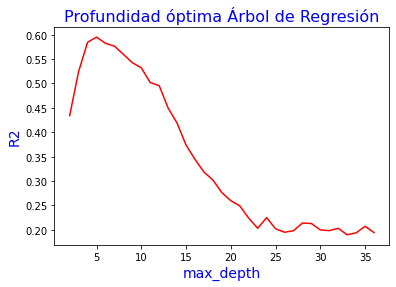

In [46]:
# Visualizar qué valor de max_depth lleva a una puntuación R2 más alta

import matplotlib.pyplot as plt
plt.plot(max_profundidad_rango, r2, color = 'red')
plt.rcParams["figure.figsize"] = (12, 8)
plt.xlabel('max_depth', fontsize = 14 , color = 'blue')
plt.ylabel('R2',fontsize = 14 , color = 'blue');
plt.title('Profundidad óptima Árbol de Regresión', fontsize = 16 , color = 'blue')

In [48]:
dec_tree_5 = DecisionTreeRegressor(max_depth = 5, random_state = 42)
dec_tree_5.fit(X_train_processed, y_train)
train_5_score = dec_tree_5.score(X_train_processed, y_train)
test_5_score = dec_tree_5.score(X_test_processed, y_test)
print(train_5_score)
print(test_5_score)

0.6039397477322956
0.5947099753159972


In [47]:
y_test

7503    1743.0644
2957     356.8688
7031     377.5086
1084    5778.4782
856     2356.9320
          ...    
4753    3793.7284
4836    2410.8618
8064    5309.7550
4418    2530.7058
1784    4138.6128
Name: Item_Outlet_Sales, Length: 2131, dtype: float64

[Text(0.5, 0.9166666666666666, 'X[3] <= 0.025\nsquared_error = 2959455.705\nsamples = 6392\nvalue = 2209.979'),
 Text(0.25, 0.75, 'X[31] <= 0.5\nsquared_error = 967180.653\nsamples = 3170\nvalue = 1364.229'),
 Text(0.125, 0.5833333333333334, 'X[3] <= -1.019\nsquared_error = 21558.594\nsamples = 390\nvalue = 208.122'),
 Text(0.0625, 0.4166666666666667, 'X[3] <= -1.461\nsquared_error = 5977.139\nsamples = 146\nvalue = 120.97'),
 Text(0.03125, 0.25, 'X[3] <= -1.575\nsquared_error = 3181.411\nsamples = 78\nvalue = 90.079'),
 Text(0.015625, 0.08333333333333333, 'squared_error = 3065.174\nsamples = 44\nvalue = 77.414'),
 Text(0.046875, 0.08333333333333333, 'squared_error = 2855.629\nsamples = 34\nvalue = 106.469'),
 Text(0.09375, 0.25, 'X[16] <= 0.5\nsquared_error = 6833.854\nsamples = 68\nvalue = 156.404'),
 Text(0.078125, 0.08333333333333333, 'squared_error = 6018.883\nsamples = 65\nvalue = 151.833'),
 Text(0.109375, 0.08333333333333333, 'squared_error = 14229.696\nsamples = 3\nvalue = 255

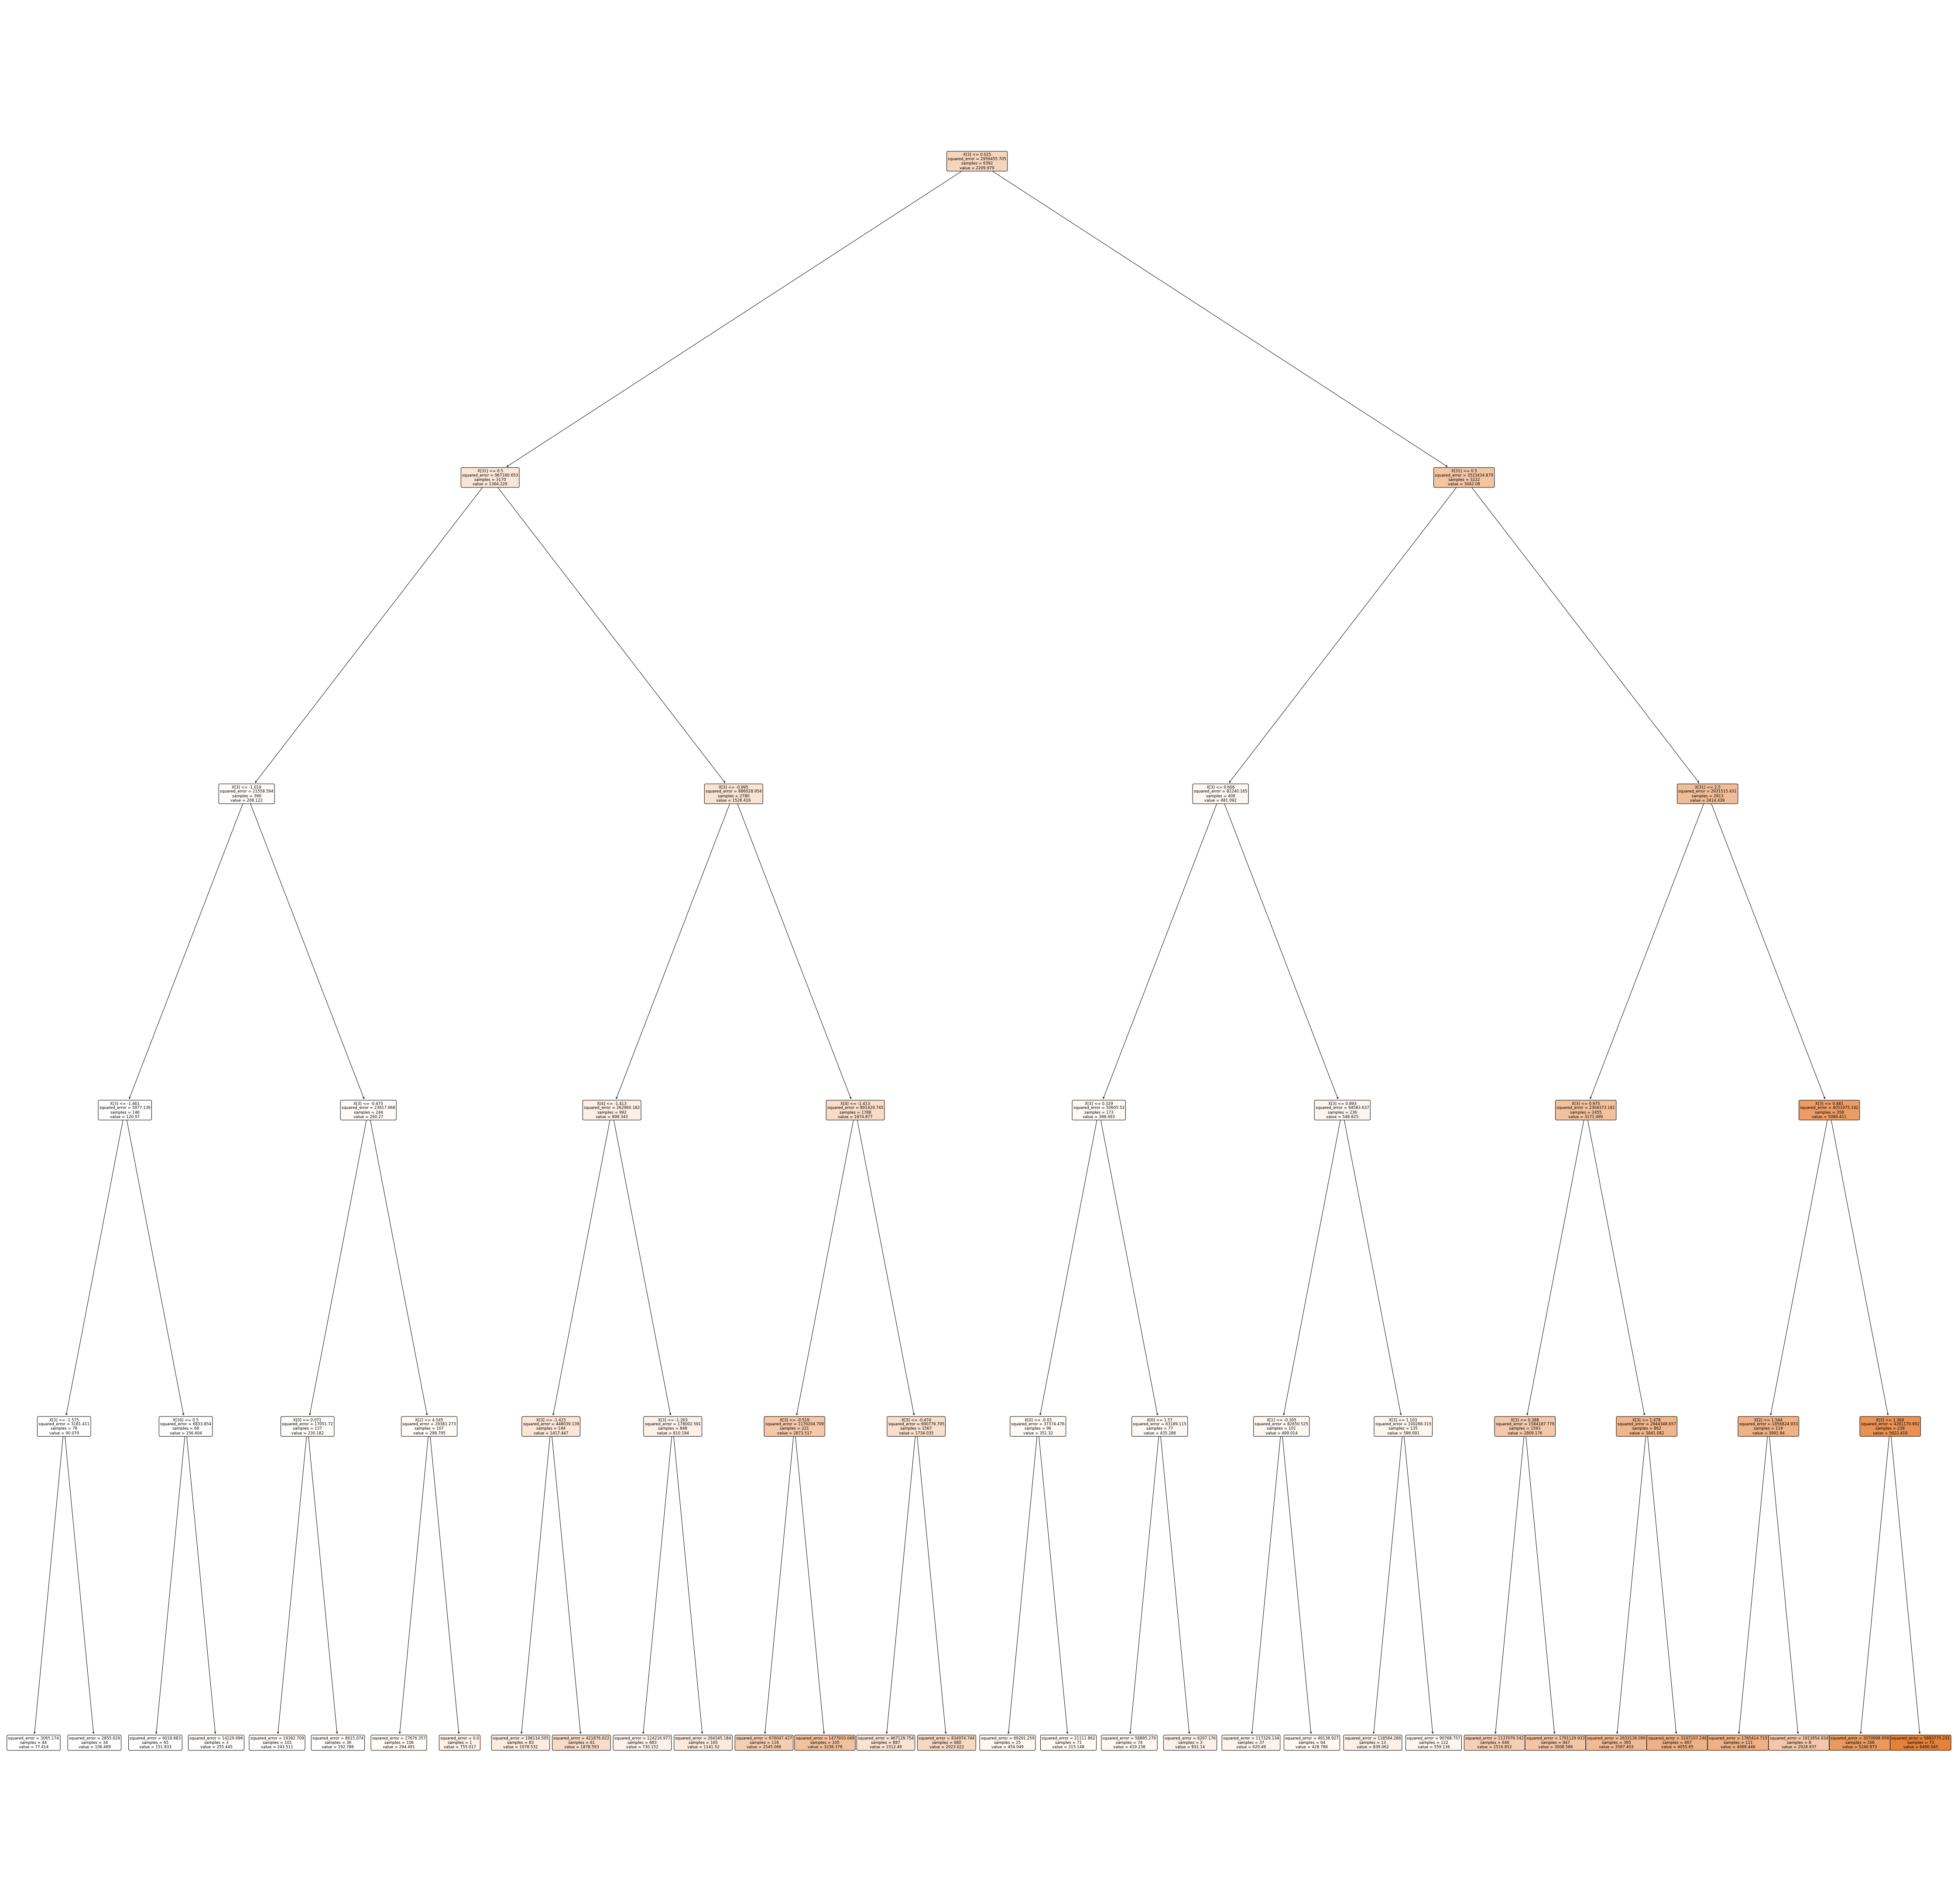

In [65]:
from sklearn import tree
plt.figure(figsize=(80,80))
tree.plot_tree(dec_tree_5,
               rounded = True,
               filled = True)

In [63]:
np.array(y_test)

array([1743.0644,  356.8688,  377.5086, ..., 5309.755 , 2530.7058,
       4138.6128])

In [51]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(max_depth=5) # Prueba cambiar el hiperparámetro de profundidad máxima!
tree_reg.fit(X_train_processed, y_train)

DecisionTreeRegressor(max_depth=5)

Validando la profundidad óptima que deberia tener nuestro árbol es 5 nodos, lo cual mejora nuestro score de 19% a 59% en nuestro set de prueba.



Una vez aplicado diferentes métricas para medir el rendimiento de nuestro modelo, es apropiado decir que el modelo bajo un arbol de regresión tiene mejores resultados si lo comparamos con el coeficiente de determinación calculado bajo regresión lineal (pasamos de 56% a un 59%), manteniendose la tendencia deficiente en los resultados de predicción de nuestro modelo.
Situación similar corre si comparamos este resultado con el obtenido por RMSE , ya que por este último el error obtenido es muy alto.

Por lo anterior, el modelo que recomiendo implementar es el arbol de regresion ya que los datos de prediccion en set de prueba son mas optimos.


**Presentación de resultados**

file:///Users/angelicaacevedo/Downloads/Presentaci%C3%B3n%20Trabajo%20Proyecto%20Creativo%20Profesional%20Marketing%20Multicolor.pdf